In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.colors as mcolors

# Define the path to the directories containing result.jsonl files
base_path = Path("assets")
model_dirs = [
    base_path / "Xwin-LM" / "Xwin-LM-7B-V0.1",
    base_path / "Xwin-LM" / "Xwin-LM-13B-V0.1",
    base_path / "Xwin-LM" / "Xwin-LM-7B-V0.1-gguf-q4km-hf",
    base_path / "Xwin-LM" / "Xwin-LM-13B-V0.1-gguf-q4km-hf",
    #base_path / "Xwin-LM" / "Xwin-LM-70B-V0.1",

    base_path / "elyza" / "ELYZA-japanese-Llama-2-7b-instruct",
    base_path / "elyza" / "ELYZA-japanese-Llama-2-7b-instruct-gguf-q4km-hf",
    base_path / "elyza" / "ELYZA-japanese-Llama-2-13b-instruct",
    base_path / "elyza" / "ELYZA-japanese-Llama-2-13b-instruct-gguf-q4km-hf",

    base_path / "cyberagent" / "calm2-7b-chat",
    base_path / "cyberagent" / "calm2-7b-chat-gguf-q4km-hf",

    base_path / "stabilityai" / "japanese-stablelm-instruct-beta-7b",
    base_path / "stabilityai" / "japanese-stablelm-instruct-beta-7b-gguf-q4km-hf",
    #base_path / "stabilityai" / "japanese-stablelm-base-beta-70b-GGUF_TheBloke",

    base_path / "rinna" / "youri-7b-chat",
    base_path / "rinna" / "youri-7b-chat-gguf-q4km-hf",

    base_path / "tokyotech-llm" / "Swallow-7b-instruct",
    base_path / "tokyotech-llm" / "Swallow-13b-instruct",
    
    base_path / "tokyotech-llm" / "Swallow-7b-instruct-gguf-q4km-hf",
    base_path / "tokyotech-llm" / "Swallow-13b-instruct-gguf-q4km-hf",
]

# Dictionary to hold the statistical data for each model, including its parent
stats_data = {}

# Loop through each directory, read the result.jsonl file, and calculate the statistics
for model_dir in model_dirs:
    # Construct the file path
    file_path = model_dir / "result.jsonl"

    # Read the file
    df = pd.read_json(file_path, lines=True)
    
    # Calculate statistics
    mean_grade = df['grade'].mean()
    std_dev = df['grade'].std()
    median_grade = df['grade'].median()
    min_grade = df['grade'].min()
    max_grade = df['grade'].max()
    count = df['grade'].count()

    # Extract the model name and its parent
    model_name = model_dir.parts[-1]
    parent_name = model_dir.parent.parts[-1]
    stats_data[model_name] = [mean_grade, std_dev, median_grade, min_grade, max_grade, count, parent_name]

# Sort the stats_data dictionary by mean grade in descending order
sorted_stats_data = dict(sorted(stats_data.items(), key=lambda item: item[1][0], reverse=True))

In [13]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(sorted_stats_data, orient='index', columns=['Mean Grade', 'Standard Deviation', 'Median Grade', 'Min Grade', 'Max Grade', 'Count', 'Parent Name'])

# Reset the index to have the model names as a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'Model Name'}, inplace=True)

In [17]:
print(df.to_csv())

,Model Name,Mean Grade,Standard Deviation,Median Grade,Min Grade,Max Grade,Count,Parent Name
0,calm2-7b-chat-gguf-q4km-hf,2.58,1.3646326326972478,3.0,1,5,100,cyberagent
1,ELYZA-japanese-Llama-2-13b-instruct,2.57,1.444285150501658,3.0,1,5,100,elyza
2,Xwin-LM-13B-V0.1-gguf-q4km-hf,2.54,1.3811135896350986,2.5,1,5,100,Xwin-LM
3,ELYZA-japanese-Llama-2-13b-instruct-gguf-q4km-hf,2.46,1.344047858695756,3.0,1,5,100,elyza
4,Xwin-LM-13B-V0.1,2.43,1.289076092291364,3.0,1,5,100,Xwin-LM
5,Xwin-LM-7B-V0.1,2.32,1.28613429086601,2.0,1,5,100,Xwin-LM
6,ELYZA-japanese-Llama-2-7b-instruct,2.3,1.359589956010579,2.0,1,5,100,elyza
7,calm2-7b-chat,2.26,1.3074765579141174,2.0,1,5,100,cyberagent
8,ELYZA-japanese-Llama-2-7b-instruct-gguf-q4km-hf,2.2,1.279204298133662,2.0,1,5,100,elyza
9,Swallow-13b-instruct,2.12,1.3278675849768768,1.0,1,5,100,tokyotech-llm
10,Xwin-LM-7B-V0.1-gguf-q4km-hf,1.96,1.1627205992495322,1.5,1,5,100,Xwin-LM
11,youri-7b-chat,1.93,1.3123731299913282,1.0,1,5,100,rinna
12,Swallow-7b-instruct,1

In [4]:
from pathlib import Path
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def natural_sort_key(path):
    """
    Generate a sorting key for each path that allows for natural (human-like) sorting.
    This function will split the path into parts and convert any numbers into integers for proper sorting.
    """
    def convert(text):
        return int(text) if text.isdigit() else text.lower()

    return [convert(c) for c in re.split('([0-9]+)', path.name)]

# Sorting the list using natural sort order
#violin_model_dirs = sorted(violin_model_dirs_raw, key=lambda x: (x.parent.name, natural_sort_key(x)))
violin_model_dirs = model_dirs

# Prepare a list to store the text lengths for each model
text_lengths = []
models = []
parents = []  # List to hold the parent directory names

# Loop through each directory, read the result.jsonl file and calculate the statistics
for model_dir in violin_model_dirs:
    # Construct the file path
    file_path = model_dir / "preds.jsonl"

    # Read the file
    df = pd.read_json(file_path, lines=True)

    # Calculate text length
    df['text_length'] = df['pred'].apply(len)

    # Append the results to the lists
    text_lengths.extend(df['text_length'])
    models.extend([model_dir.name] * len(df))
    parents.extend([model_dir.parent.name] * len(df))  # Get the parent directory name

# Create a DataFrame from the text lengths, model names, and parent directory names
lengths_df = pd.DataFrame({'Parent': parents, 'Model': models, 'Text Length': text_lengths})

In [5]:
# Define the color map and hatch patterns
color_map = plt.cm.get_cmap('tab10')
hatch_patterns = ['/', '\\', '|', 'x', '+', '.', 'o', 'O', '-', '*']

# Unique parents based on your directories (considering they are the same across data loading)
unique_parents = set([dir.parent.name for dir in model_dirs])

# Generate color and hatch mappings
parent_colors = {parent: color_map(i % 10) for i, parent in enumerate(unique_parents)}
parent_hatches = {parent: hatch_patterns[i % len(hatch_patterns)] for i, parent in enumerate(unique_parents)}


/tmp/ipykernel_16529/4081846372.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


/tmp/ipykernel_16529/3415916447.py:19: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=mcolors.to_rgba(color, alpha=0.5), edgecolor=color, hatch=parent_hatches[parent])


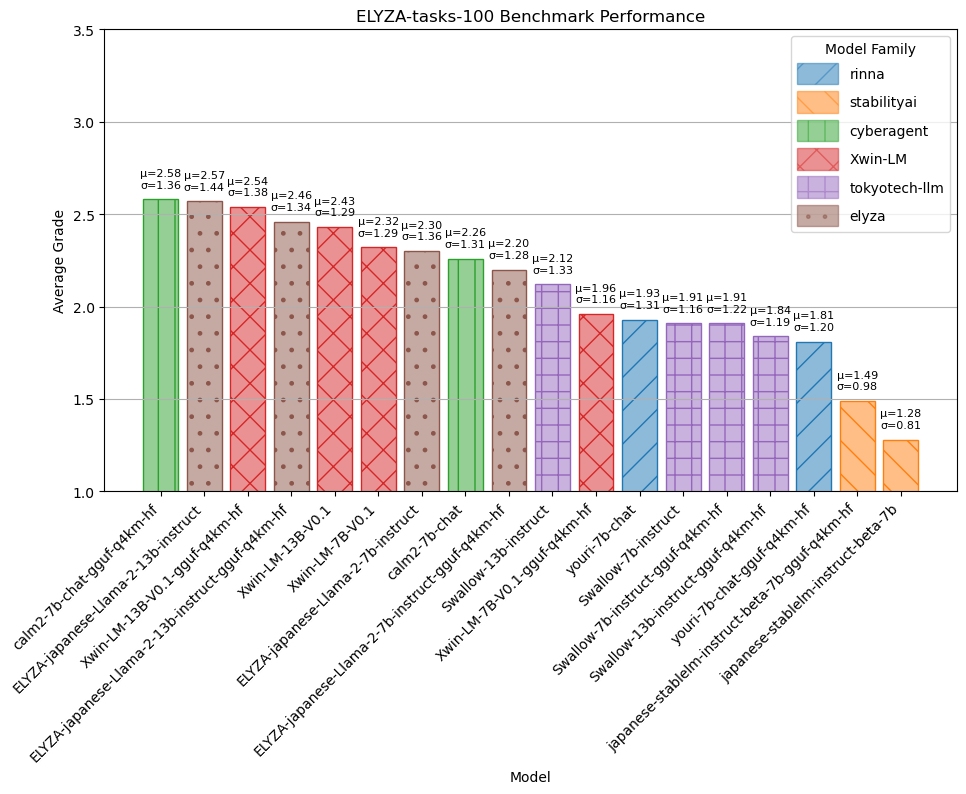

In [6]:
# Creating a bar chart with colors and hatch patterns
plt.figure(figsize=(11, 6))

for i, (model, stats) in enumerate(sorted_stats_data.items()):
    parent_name = stats[6]
    color, hatch = parent_colors[parent_name], parent_hatches[parent_name]
    fill_color = mcolors.to_rgba(color, alpha=0.5)
    plt.bar(model, stats[0], capsize=5, color=fill_color, edgecolor=color, hatch=hatch, linewidth=1)
    plt.text(i, stats[0], f"μ={stats[0]:.2f}\nσ={stats[1]:.2f}\n", ha='center', fontsize=8)

plt.xlabel('Model')
plt.ylabel('Average Grade')
plt.title('ELYZA-tasks-100 Benchmark Performance')
plt.xticks(rotation=45, ha='right')
plt.ylim(1, 3.5)
plt.grid(axis="y")

# Create a legend for the parents
handles = [plt.Rectangle((0,0),1,1, color=mcolors.to_rgba(color, alpha=0.5), edgecolor=color, hatch=parent_hatches[parent])
           for parent, color in parent_colors.items()]
plt.legend(handles, parent_colors.keys(), title='Model Family', handlelength=3, handleheight=2)

plt.show()


/tmp/ipykernel_16529/1721363702.py:43: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=mcolors.to_rgba(color, alpha=0.5), edgecolor=color, hatch=parent_hatches[parent])


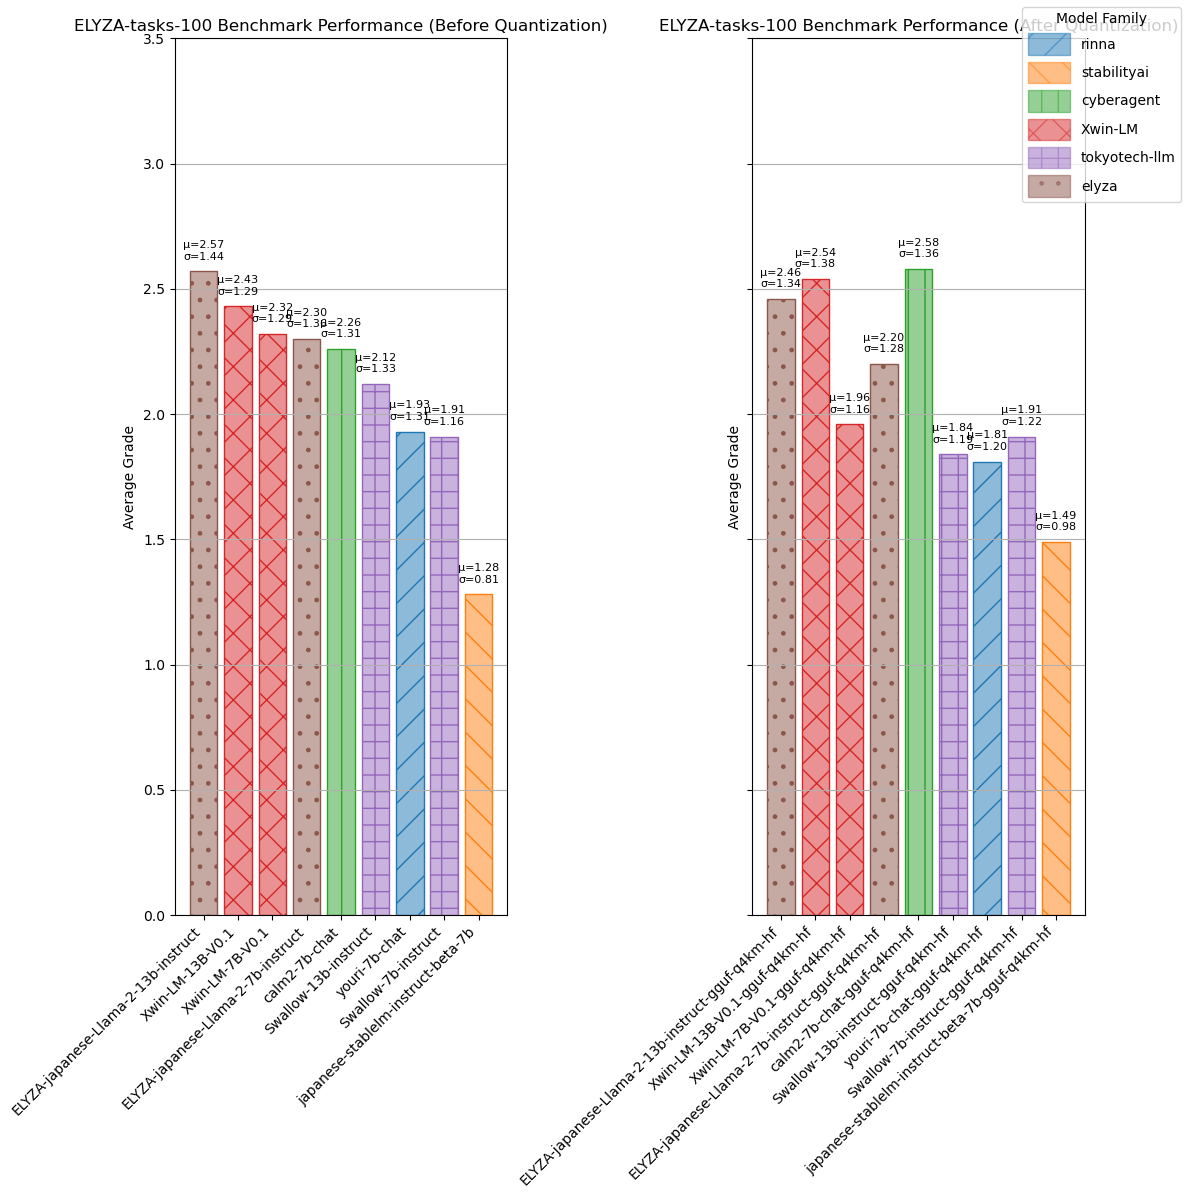

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming sorted_stats_data, parent_colors, and parent_hatches dictionaries are defined

# Function to extract the base model name (without "gguf")
def base_model_name(model):
    return model.replace("-gguf-q4km-hf", "")

# Sort non-"gguf" models
sorted_no_gguf_stats_data = {model: stats for model, stats in sorted_stats_data.items() if "gguf" not in model}

# Sort "gguf" models based on non-"gguf" order
sorted_gguf_models = {base_model_name(model): model for model in sorted_stats_data if "gguf" in model}
sorted_gguf_stats_data = {sorted_gguf_models[base_model_name(model)]: sorted_stats_data[sorted_gguf_models[base_model_name(model)]] 
                          for model in sorted_no_gguf_stats_data if base_model_name(model) in sorted_gguf_models}

# Create a 2-row subplot structure without sharing the x-axis
fig, axs = plt.subplots(1, 2, figsize=(11, 12), sharey=True)

def plot_bars(data, ax, title):
    for i, (model, stats) in enumerate(data.items()):
        parent_name = stats[6]
        color, hatch = parent_colors[parent_name], parent_hatches[parent_name]
        fill_color = mcolors.to_rgba(color, alpha=0.5)
        ax.bar(i, stats[0], capsize=5, color=fill_color, edgecolor=color, hatch=hatch, linewidth=1)
        ax.text(i, stats[0], f"μ={stats[0]:.2f}\nσ={stats[1]:.2f}\n", ha='center', fontsize=8)

    ax.set_title(title)
    ax.set_ylabel('Average Grade')
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data.keys(), rotation=45, ha='right')
    ax.set_ylim(0, 3.5)
    ax.grid(axis="y")

# Plot for models without "gguf" in their names
plot_bars(sorted_no_gguf_stats_data, axs[0], 'ELYZA-tasks-100 Benchmark Performance (Before Quantization)')

# Plot for models with "gguf" in their names
plot_bars(sorted_gguf_stats_data, axs[1], 'ELYZA-tasks-100 Benchmark Performance (After Quantization)')

# Create a legend for the parents
handles = [plt.Rectangle((0,0),1,1, color=mcolors.to_rgba(color, alpha=0.5), edgecolor=color, hatch=parent_hatches[parent])
           for parent, color in parent_colors.items()]
fig.legend(handles, parent_colors.keys(), title='Model Family', handlelength=3, handleheight=2, loc='upper right')

plt.tight_layout()
plt.show()


In [24]:
print(lengths_df)

             Parent                                         Model  Text Length
0           Xwin-LM                               Xwin-LM-7B-V0.1          528
1           Xwin-LM                               Xwin-LM-7B-V0.1          593
2           Xwin-LM                               Xwin-LM-7B-V0.1          940
3           Xwin-LM                               Xwin-LM-7B-V0.1          661
4           Xwin-LM                               Xwin-LM-7B-V0.1          641
...             ...                                           ...          ...
1895  tokyotech-llm  Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-claude          459
1896  tokyotech-llm  Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-claude          720
1897  tokyotech-llm  Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-claude           28
1898  tokyotech-llm  Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-claude          709
1899  tokyotech-llm  Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-claude          280

[1900 rows x 3 columns]


In [25]:
parent_colors

{'stabilityai': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765,
  1.0),
 'elyza': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 'tokyotech-llm': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313,
  1.0),
 'Xwin-LM': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 'rinna': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 'cyberagent': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354,
  1.0)}

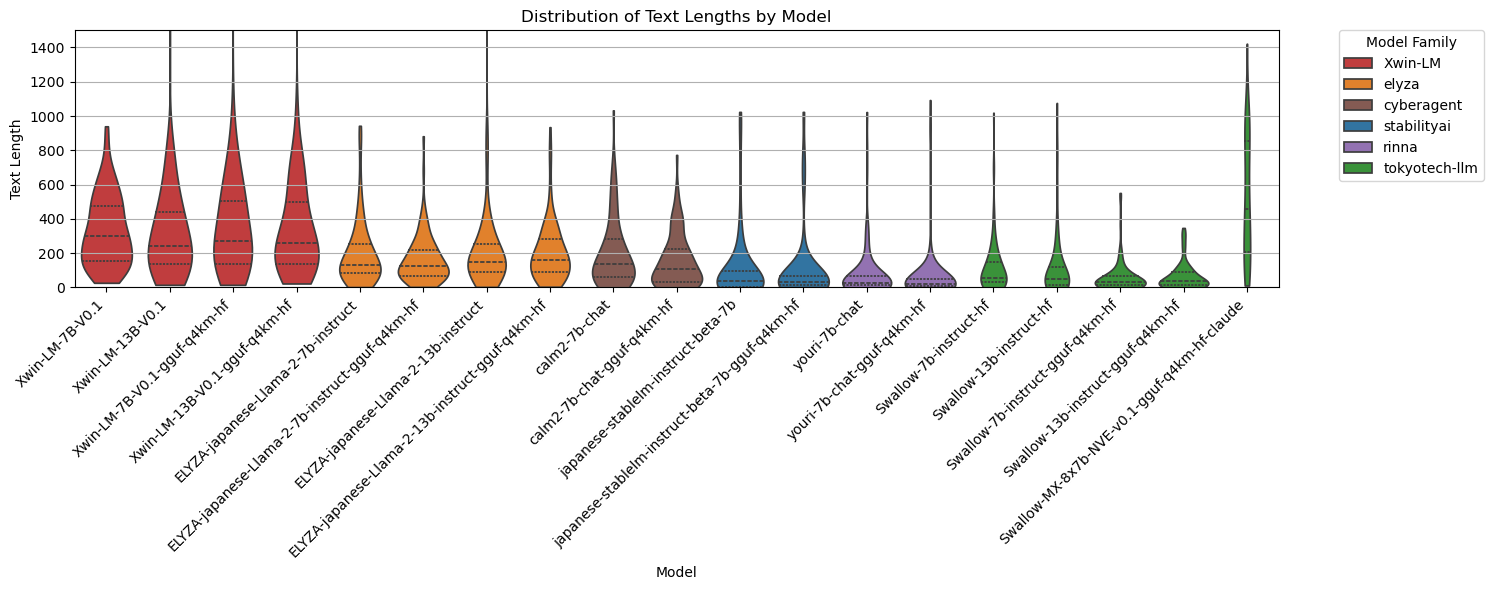

In [26]:
plt.figure(figsize=(13, 6))

# Generate a plot with individual models, using 'hue' for coloring by 'Parent'
sns.violinplot(x='Model', y='Text Length', hue='Parent', data=lengths_df, palette=parent_colors, 
                    inner='quartile', cut=0)

# Improve the x-tick labels readability and plot aesthetics
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Text Lengths by Model')
plt.tight_layout()
plt.grid(axis="y")

# Set the y-axis limit. For example, to set the maximum y-axis value to 500:
plt.ylim(0, 1500)

# Adjust legend location
plt.legend(title='Model Family', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


/tmp/ipykernel_111/1099141235.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.swarmplot(x='Model', y='Text Length', s=1.35, hue='Parent', data=lengths_df, color='k', alpha=0.75)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn

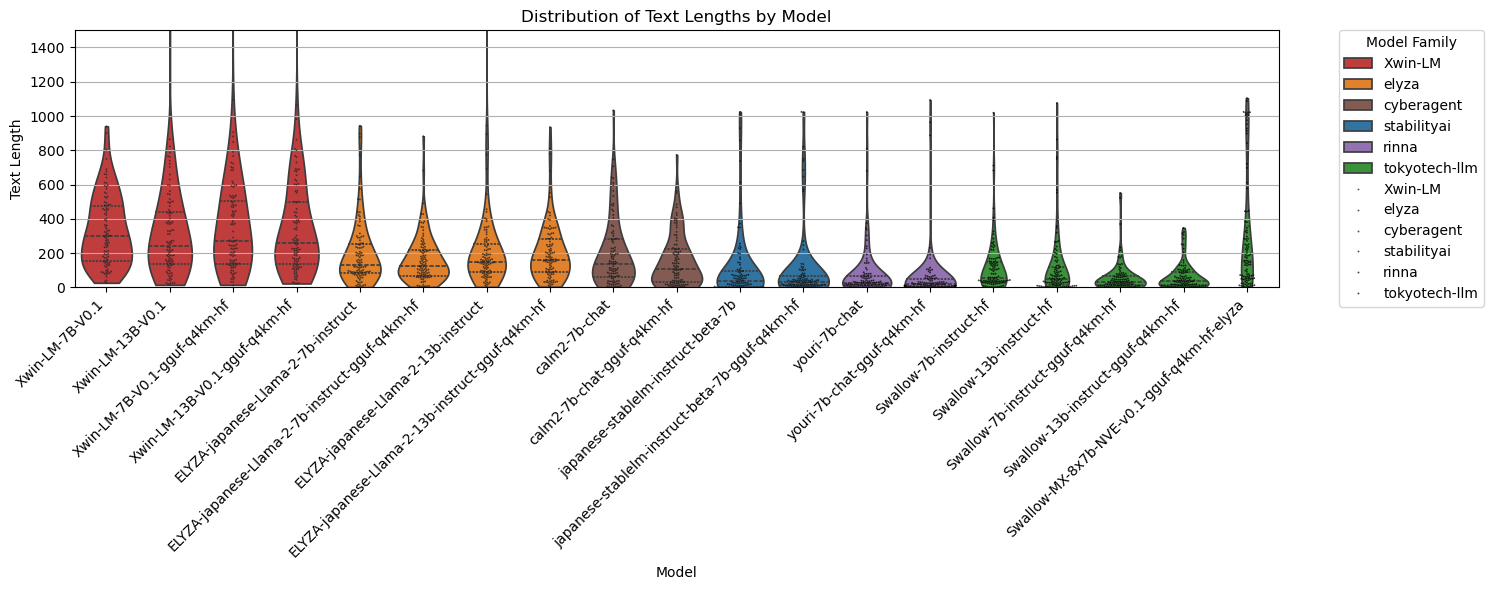

In [10]:
plt.figure(figsize=(13, 6))

# Generate a plot with individual models, using 'hue' for coloring by 'Parent'
sns.violinplot(x='Model', y='Text Length', hue='Parent', data=lengths_df, palette=parent_colors, 
                    inner='quartile', cut=0)
sns.swarmplot(x='Model', y='Text Length', s=1.35, hue='Parent', data=lengths_df, color='k', alpha=0.75)

# Improve the x-tick labels readability and plot aesthetics
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Text Lengths by Model')
plt.tight_layout()
plt.grid(axis="y")

# Set the y-axis limit. For example, to set the maximum y-axis value to 500:
plt.ylim(0, 1500)

# Adjust legend location
plt.legend(title='Model Family', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_111/2152118524.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 30.0% of the po

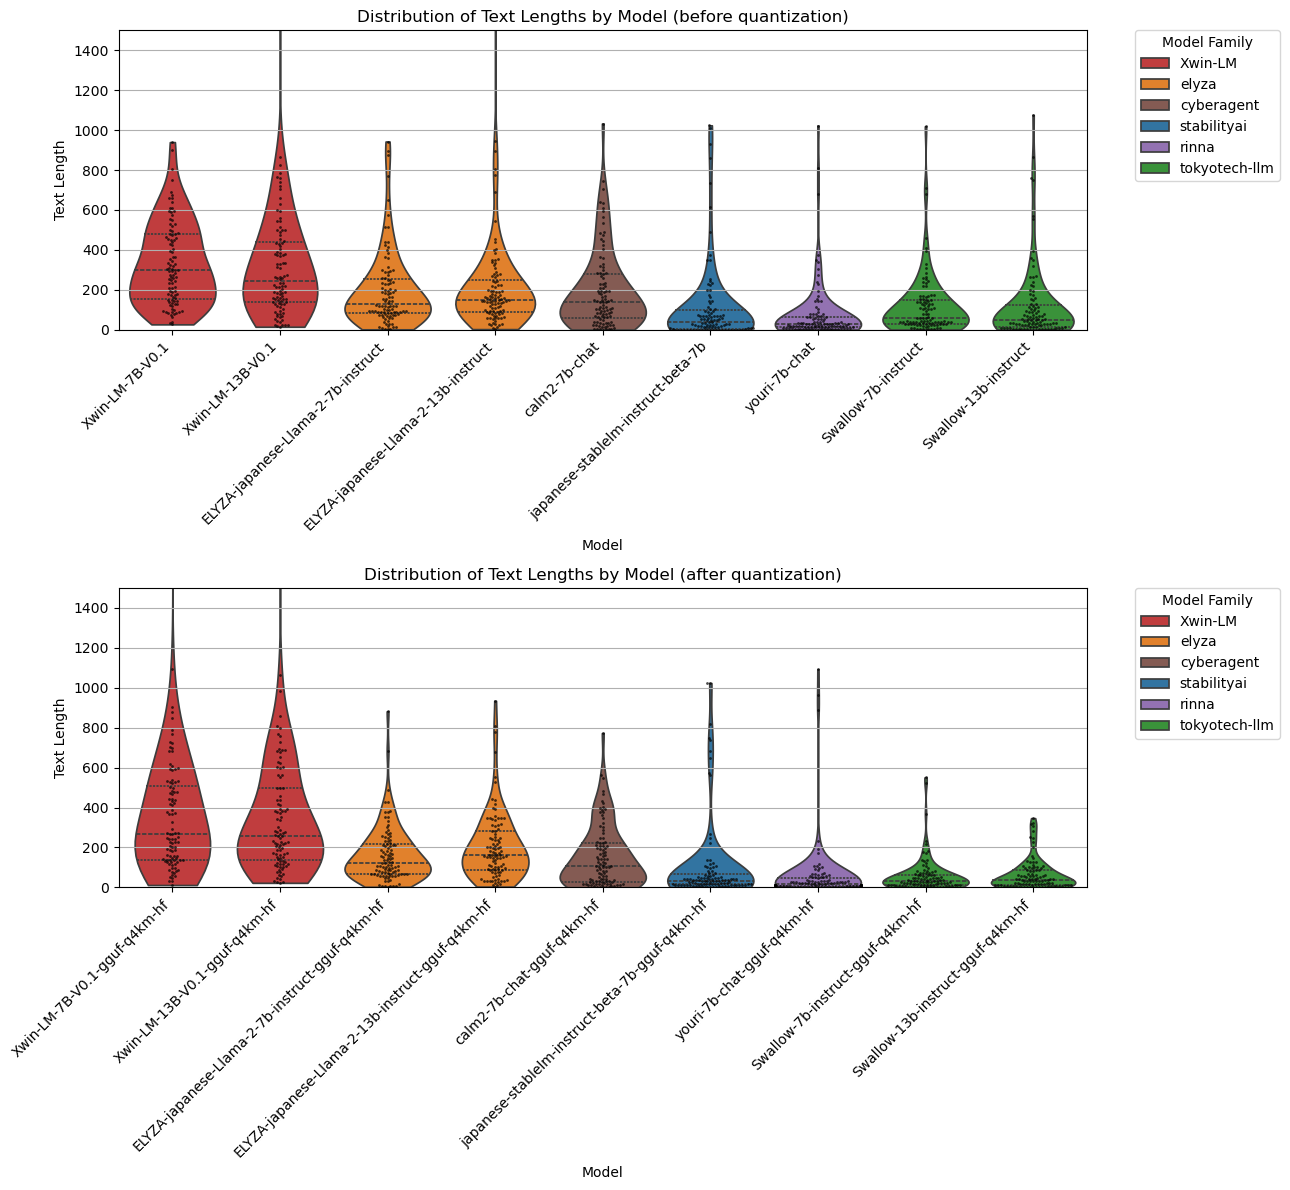

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the data into two DataFrames based on the presence of "gguf" in the model names
gguf_df = lengths_df[lengths_df['Model'].str.contains("gguf")]
no_gguf_df = lengths_df[~lengths_df['Model'].str.contains("gguf")]

# Create a 2-row subplot structure
fig, axs = plt.subplots(2, 1, figsize=(13, 12))

# Plot for models without "gguf" in the name
sns.violinplot(x='Model', y='Text Length', hue='Parent', data=no_gguf_df, ax=axs[0],
               palette=parent_colors, inner='quartile', cut=0)
sns.swarmplot(x='Model', y='Text Length', data=no_gguf_df, ax=axs[0], color='k', alpha=0.7, s=2)

axs[0].set_title('Distribution of Text Lengths by Model (before quantization)')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
axs[0].set_ylim(0, 1500)
axs[0].grid(axis="y")
axs[0].legend(title='Model Family', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Plot for models with "gguf" in the name
sns.violinplot(x='Model', y='Text Length', hue='Parent', data=gguf_df, ax=axs[1],
               palette=parent_colors, inner='quartile', cut=0)
sns.swarmplot(x='Model', y='Text Length', data=gguf_df, ax=axs[1], color='k', alpha=0.7, s=2)
axs[1].set_title('Distribution of Text Lengths by Model (after quantization)')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')
axs[1].set_ylim(0, 1500)
axs[1].grid(axis="y")
axs[1].legend(title='Model Family', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Adjust layout
plt.tight_layout()
plt.show()
